<a href="https://colab.research.google.com/github/cherkashin-py/dap-2024/blob/main/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа №8. Кластеризация**

**Задание 1. Импортируйте модель данных "Ирисы Фишера".**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Загрузка данных "Ирисы Фишера"
iris = load_iris()
data = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)

# Вывод первых строк данных
print("Данные Ирисы Фишера:")
print(data.head())


Данные Ирисы Фишера:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


**Задание 2. Выполните нормализацию данных**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Отделение признаков от целевой переменной
features = data.iloc[:, :-1]  # Все столбцы, кроме последнего
target = data['target']       # Целевая переменная

# Нормализация данных
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Преобразование в DataFrame для удобства
normalized_data = pd.DataFrame(normalized_features, columns=features.columns)

# Вывод нормализованных данных
print("\nНормализованные данные:")
print(normalized_data.head())



Нормализованные данные:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


**Задание 3. Постройте модель кластеризации используя алгоритм DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples**

In [ ]:
from sklearn.cluster import DBSCAN

# Параметры DBSCAN
eps = 0.3
min_samples = 4

# Кластеризация
clustering_model = DBSCAN(eps=eps, min_samples=min_samples)
clusters = clustering_model.fit_predict(normalized_features)

# Добавление результатов кластеризации в данные
normalized_data['cluster'] = clusters

# Вывод кластеров
print("\nРезультаты кластеризации:")
print(normalized_data['cluster'].value_counts())



Результаты кластеризации:
cluster
 1    99
 0    50
-1     1
Name: count, dtype: int64


**Задание 4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров**

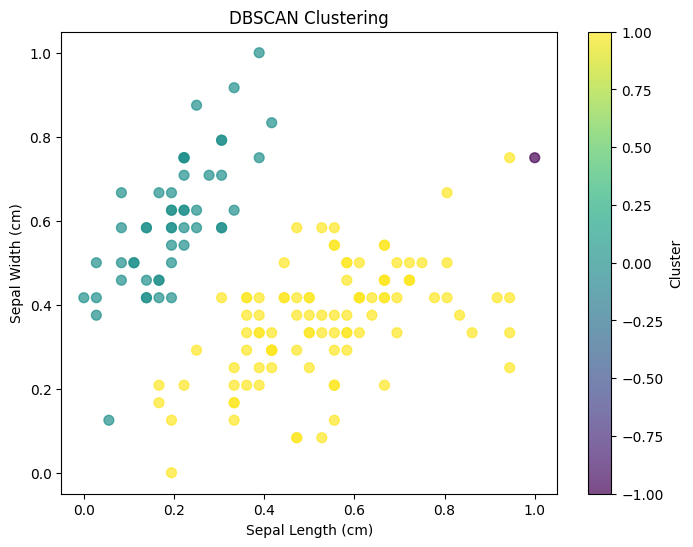

In [ ]:
import matplotlib.pyplot as plt

# Диаграмма рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(
    normalized_data['sepal length (cm)'],
    normalized_data['sepal width (cm)'],
    c=clusters,
    cmap='viridis',
    s=50,
    alpha=0.7
)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()


**Вывод:**

*   В ходе кластеризации данные были разделены на несколько кластеров с использованием алгоритма DBSCAN.
*   Алгоритм выделяет плотные области в пространстве признаков, а точки за пределами этих областей считаются выбросами (отмечены как кластер -1).
*   На диаграмме рассеяния видно, что признаки sepal length и sepal width могут быть использованы для визуального разделения кластеров.